# <center>ANN Binary Classification on Gender Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout
from imblearn.over_sampling import SMOTE

In [2]:
data =pd.read_csv('./gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
data.shape

(5001, 8)

In [4]:
data.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [5]:
data.isnull().mean()*100
data.drop_duplicates(inplace= True)

In [6]:
le =LabelEncoder()

In [7]:
data['gender'] =le.fit_transform(data.gender)

In [8]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
sc= StandardScaler()

In [11]:
x = sc.fit_transform(x)

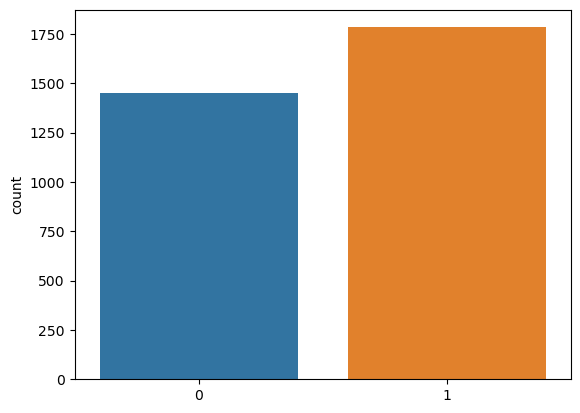

In [12]:
sns.countplot(x=y);


In [13]:
oversample =SMOTE()
x,y =oversample.fit_resample(x,y)

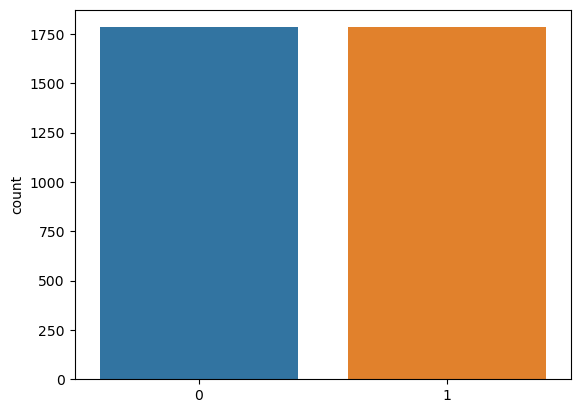

In [14]:
sns.countplot(x=y);

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
tf.random.set_seed(42)

In [17]:
model =Sequential()

### Adding Neuron 

In [18]:
model.add(Dense(128,activation='relu',input_dim =x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling The Model

In [19]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Early Stopping Callback

In [20]:
early_stopping = EarlyStopping(monitor='val_loss',patience=50,mode='min',restore_best_weights=True,
                              verbose =1)

### Model Training

In [21]:
history =model.fit(x_train,y_train,batch_size=32,callbacks=[early_stopping],epochs=500,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/500
90/90 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9278 - val_loss: 0.1009 - val_accuracy: 0.9524
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9499 - val_loss: 0.0962 - val_accuracy: 0.9608
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9492 - val_loss: 0.0919 - val_accuracy: 0.9636
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9555 - val_loss: 0.0927 - val_accuracy: 0.9650
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9579 - val_loss: 0.0933 - val_accuracy: 0.9622
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9534 - val_loss: 0.0928 - val_accuracy: 0.9594
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9583 - val_loss: 0.0917 - val_accuracy: 0.9636
Epoch 8/500
9

Epoch 59/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9727 - val_loss: 0.1100 - val_accuracy: 0.9636
Epoch 60/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9712 - val_loss: 0.1094 - val_accuracy: 0.9636
Epoch 61/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9698 - val_loss: 0.1148 - val_accuracy: 0.9636
Epoch 62/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9716 - val_loss: 0.1148 - val_accuracy: 0.9636
Epoch 63/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9688 - val_loss: 0.1156 - val_accuracy: 0.9608
Epoch 64/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9723 - val_loss: 0.1137 - val_accuracy: 0.9608
Epoch 65/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9751 - val_loss: 0.1118 - val_accuracy: 0.9650
Epoch 

### Evaluating the Model

In [22]:
history_dict =history.history

#### 1.Learning Curve

In [23]:
acc = history_dict['accuracy']
val_acc =history_dict['val_accuracy']

#### 2.Loss

In [24]:
loss = history_dict['loss']
val_loss =history_dict['val_loss']

#### 3.Range of x or number of epochs in the graphm

In [25]:
epochs = range(1,len(acc)+1)

#### 4.Plot

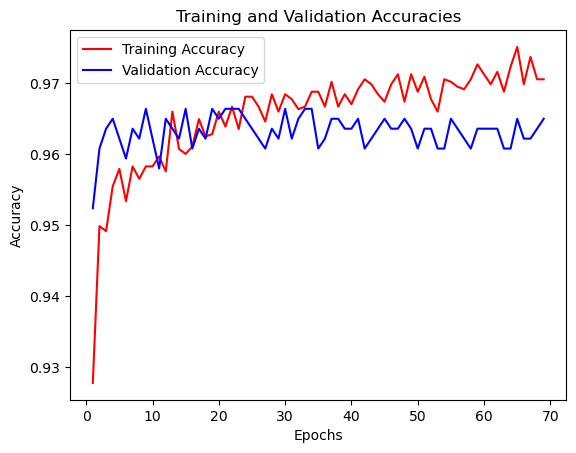

In [26]:
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label ='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_pred =model.predict(x_test)

23/23 [==============================] - 0s 892us/step


In [28]:
y_pred =(y_pred>0.5)

In [29]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [30]:
matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

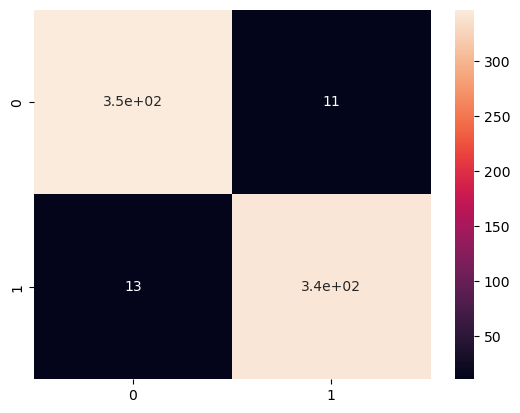

In [31]:
sns.heatmap(matrix,annot=True)

<h3> Classification Report
<h6><li>A classification report is a tool used in machine learning to evaluate the performance of a classification model. It provides a summary of various metrics that describe the model's performance, such as precision, recall, and F1-score

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       358
           1       0.97      0.96      0.97       356

    accuracy                           0.97       714
   macro avg       0.97      0.97      0.97       714
weighted avg       0.97      0.97      0.97       714

